# Finding Musical Genres


## Purpose of Notebook
The purpose of this notebook is to show how to collect and store audio features data for tracks from the [official Spotify Web API](https://developer.spotify.com/documentation/web-api/) for futher exploratory data analysis and machine learning.  

## Related Notebooks

1. [spotify-data-retrieval](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-retrieval.ipynb) walks through collecting liked tracks using Spotipy as a Python wrapper for the Spotify API and attaching audio features to each track and storing in a dataframe.
2. [spotify-data-exploration](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-exploration.ipynb) is an exploratory data analysis of my liked tracks
3. **[spotify-data-clustering](https://github.com/rtedwards/spotify-data-visualizations/blob/master/spotify-data-visualizations/spotify-data-clustering.ipynb)** attempts to finds genres in my liked tracks using K-Means clustering from 


## Resources
### Spotify Web API
Spotify has a number of [API endpoints](https://developer.spotify.com/documentation/web-api/reference-beta/) available to access the Spoitfy data.  In this notebook, I use the following endpoints:

+ [search endpoint](https://developer.spotify.com/documentation/web-api/reference/search/search/) to get the track IDs
+ [audio features endpoint](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/) to get the corresponding audio features.


### K-Means Clustering

+ [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)


In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from IPython.display import IFrame  # for embedding Spotify player

First, we need to import the data:

In [4]:
df = pd.read_csv('data/saved-songs.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3110 entries, 0 to 3109
Data columns (total 22 columns):
Unnamed: 0          3110 non-null int64
artist_name         3110 non-null object
track_name          3110 non-null object
track_id            3110 non-null object
popularity          3110 non-null int64
acousticness        3110 non-null float64
analysis_url        3110 non-null object
danceability        3110 non-null float64
duration_ms         3110 non-null int64
energy              3110 non-null float64
instrumentalness    3110 non-null float64
key                 3110 non-null int64
liveness            3110 non-null float64
loudness            3110 non-null float64
mode                3110 non-null int64
speechiness         3110 non-null float64
tempo               3110 non-null float64
time_signature      3110 non-null int64
track_href          3110 non-null object
type                3110 non-null object
uri                 3110 non-null object
valence             3110 non-n

In [76]:
df_features = df[['popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'duration_ms', 'time_signature', 'valence']]

In [77]:
def normalize(X):
    dataNorm=((X-X.min())/(X.max()-X.min()))
    dataNorm["time_signature"] = X["time_signature"]
    return dataNorm

df_features = normalize(df_features)
df_features.sample(5)

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,duration_ms,time_signature,valence
2207,0.204545,1.000000,0.725230,0.011410,0.921132,0.154693,0.148603,0.184665,0.312776,0.008190,5,0.066256
1789,0.454545,0.021502,0.465781,0.603601,0.000046,0.077084,0.870940,0.032829,0.648008,0.083459,4,0.055077
1422,0.613636,0.007060,0.691522,0.868536,0.900910,0.102255,0.843030,0.078186,0.834666,0.043923,4,0.370256
1019,0.534091,0.342710,0.558733,0.759150,0.941355,0.230205,0.790886,0.033261,0.723644,0.065160,4,0.315897
1105,0.238636,0.389946,0.568948,0.427981,0.985844,0.108547,0.742567,0.030130,0.556951,0.011662,4,0.103590


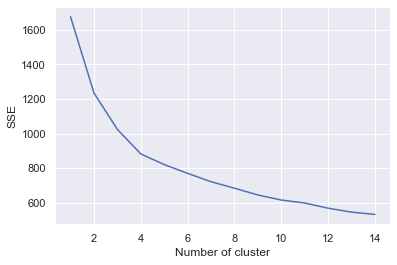

In [79]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=2, max_iter=1000).fit(df_features)
#    df_features["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df_features)
y_kmeans = kmeans.predict(df_features)

In [81]:
df['genre'] = y_kmeans
df.head(20)

,Unnamed: 0,artist_name,track_name,track_id,popularity,acousticness,analysis_url,danceability,duration_ms,energy,...,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,genre
0,0,Lauer,Mirrors (feat. Jasnau),1tTwnpx4TvhnTAzBjFditv,30,0.01500,https://api.spotify.com/v1/audio-analysis/1tTw...,0.668,258067,0.878,...,-7.538,1,0.0472,122.006,4,https://api.spotify.com/v1/tracks/1tTwnpx4Tvhn...,audio_features,spotify:track:1tTwnpx4TvhnTAzBjFditv,0.6550,1
1,1,Anderholm,Wonderland,4wl0zWqB3FMgQvAJZx2Z9V,20,0.24000,https://api.spotify.com/v1/audio-analysis/4wl0...,0.688,230620,0.908,...,-6.662,1,0.0345,120.000,4,https://api.spotify.com/v1/tracks/4wl0zWqB3FMg...,audio_features,spotify:track:4wl0zWqB3FMgQvAJZx2Z9V,0.4970,1
2,2,Ben Böhmer,Fliederregen,7kltLoEOuwwSNsCZChIaj9,46,0.01210,https://api.spotify.com/v1/audio-analysis/7klt...,0.672,265868,0.336,...,-9.384,0,0.0348,120.994,4,https://api.spotify.com/v1/tracks/7kltLoEOuwwS...,audio_features,spotify:track:7kltLoEOuwwSNsCZChIaj9,0.3110,1
3,3,Jai Piccone,Care,7eT788aFqbLJNZbYf3QaJl,40,0.51400,https://api.spotify.com/v1/audio-analysis/7eT7...,0.756,327096,0.497,...,-7.571,1,0.0419,120.994,4,https://api.spotify.com/v1/tracks/7eT788aFqbLJ...,audio_features,spotify:track:7eT788aFqbLJNZbYf3QaJl,0.6460,3
4,4,Daniel T.,Heat-Wave,5RwQuZtvlmLq6rutrcugxF,34,0.01100,https://api.spotify.com/v1/audio-analysis/5RwQ...,0.705,356224,0.656,...,-8.549,0,0.0513,126.000,4,https://api.spotify.com/v1/tracks/5RwQuZtvlmLq...,audio_features,spotify:track:5RwQuZtvlmLq6rutrcugxF,0.3970,1
5,5,Giraffage,Do U Want Me,2eTLxOZY8owibk7b2iETad,43,0.01660,https://api.spotify.com/v1/audio-analysis/2eTL...,0.722,224353,0.586,...,-10.339,1,0.0766,154.012,4,https://api.spotify.com/v1/tracks/2eTLxOZY8owi...,audio_features,spotify:track:2eTLxOZY8owibk7b2iETad,0.5940,2
6,6,Heckmann,Kookaburra - Gabriel Ananda Remix,4R2teaTwoH9Fm3jdZP0IN4,5,0.00983,https://api.spotify.com/v1/audio-analysis/4R2t...,0.813,515520,0.636,...,-10.412,1,0.0923,126.013,4,https://api.spotify.com/v1/tracks/4R2teaTwoH9F...,audio_features,spotify:track:4R2teaTwoH9Fm3jdZP0IN4,0.4410,1
7,7,Dday One,"Drum In The Day, To Sing At Night",4knU026rvLjRxwOW293S9p,22,0.00616,https://api.spotify.com/v1/audio-analysis/4knU...,0.644,290178,0.555,...,-8.963,1,0.0659,94.981,4,https://api.spotify.com/v1/tracks/4knU026rvLjR...,audio_features,spotify:track:4knU026rvLjRxwOW293S9p,0.2740,2
8,8,Giolì,Ballet des droits,5syWRcHuTQCc5Ziur7KkXK,29,0.11100,https://api.spotify.com/v1/audio-analysis/5syW...,0.839,310000,0.530,...,-11.091,0,0.0583,123.001,4,https://api.spotify.com/v1/tracks/5syWRcHuTQCc...,audio_features,spotify:track:5syWRcHuTQCc5Ziur7KkXK,0.1710,1
9,9,Kettel,Candace Bouvard,19KNZBuYo1mnkqBsgiZVT8,17,0.02260,https://api.spotify.com/v1/audio-analysis/19KN...,0.661,188581,0.732,...,-8.745,1,0.0317,135.027,4,https://api.spotify.com/v1/tracks/19KNZBuYo1mn...,audio_features,spotify:track:19KNZBuYo1mnkqBsgiZVT8,0.9050,1
